 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [45]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [46]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whalereturns_df = pd.read_csv(whale_returns_csv)
whalereturns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [47]:
#convert the dates to a DateTimeIndex. 
#df['Datetime'] = pd.to_datetime(whalereturns_df)
whalereturns_df.set_index(pd.to_datetime(whalereturns_df['Date'], infer_datetime_format=True), inplace=True)
#whalereturns_df.head()
WR_df = whalereturns_df.drop(columns=["Date"])
WR_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [48]:
# Count nulls
WR_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [49]:
# Drop nulls
WR_df_drop = WR_df.dropna()
WR_df_drop.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [50]:
WR_df_drop.head()
#WR_df_drop.dtypes - floats

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [51]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_R_df = pd.read_csv(algo_returns_csv)
algo_R_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [52]:
# Count nulls
algo_R_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [53]:
# Drop nulls
algo_R_dfdrop = algo_R_df.dropna()
algo_R_dfdrop.isnull().sum()
algo_R_dfdrop.head()
#algo_R_dfdrop.dtypes -  floats

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


In [54]:
#convert the dates to a DateTimeIndex. 
algo_R_dfdrop.set_index(pd.to_datetime(algo_R_dfdrop['Date'], infer_datetime_format=True), inplace=True)
#algo_R_dfdrop.head()

#dropextra column date
algo_drop = algo_R_dfdrop.drop(columns=["Date"])
algo_drop.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [55]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv)
sp500_history_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [56]:
# Check Data Types
sp500_history_df.dtypes
#result - object

Date     object
Close    object
dtype: object

In [57]:
# Fix Data Types
# Cleaning identified numeric fields with $ symbol
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df.head()
# Converting `order_total` from `object` to `float`
#sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')

,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06


In [58]:
# Converting `order_total` from `object` to `float`
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')

In [59]:
#checking the updated datatype
sp500_history_df.head()
#sp500_history_df.dtypes

,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06


In [60]:
#convert the dates to a DateTimeIndex. 
sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
sp500_history_df.head()

#dropextra column date
sp500_historydrop = sp500_history_df.drop(columns=["Date"])
sp500_historydrop.head()
#sp500_history_df.dtypes

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [61]:
# Calculate Daily Returns and Drop nulls
sp500_returns = sp500_historydrop.pct_change().dropna()
sp500_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [62]:
# Rename Column - Convert the S&P 500 closing prices to daily returns.
# YOUR CODE HERE
sp_Returns = sp500_returns.rename(columns={"Close": "S&P Daily Returns"})
sp_Returns.head()

,S&P Daily Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [63]:
# Concatenate all DataFrames into a single DataFrame
#WR_df_drop
#algo_drop
#sp_Returns
result = pd.concat([WR_df_drop, algo_drop, sp_Returns], axis=1, join='inner')
result.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

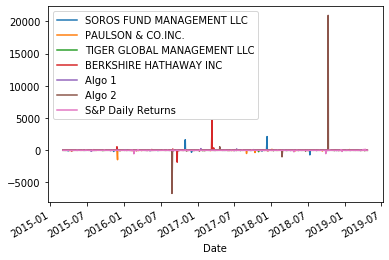

In [64]:
# Plot daily returns
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = result.pct_change()
#daily_returns.head()
# Use the `plot` function to plot the daily portfolio returns
daily_returns.plot()

In [65]:
# Plot cumulative returns
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + result).cumprod()
cumulative_returns
# Plot the daily returns of the S&P 500 over the last 5 years
#cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of MSFT over the Last 10 Years")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Daily Returns
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123
...,...,...,...,...,...,...,...
2019-04-15,1.157839,0.786506,0.862797,1.525584,1.958591,1.264103,0.725056
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,0.726708
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,0.725562


---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

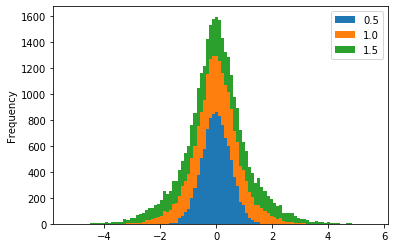

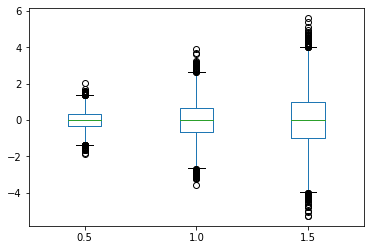

In [66]:
# Box plot to visually show risk
portfolio_a_std = np.random.normal(scale=0.5, size=10000)
portfolio_b_std = np.random.normal(scale=1.0, size=10000)
portfolio_c_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": portfolio_a_std,
    "1.0": portfolio_b_std,
    "1.5": portfolio_c_std
})

portfolio_std.plot.hist(stacked=True, bins=100)

# Plot box plot
portfolio_std.plot.box()

In [67]:
# Daily Standard Deviations
daily_std = cumulative_returns.std()
daily_std.head()

SOROS FUND MANAGEMENT LLC      0.073187
PAULSON & CO.INC.              0.088447
TIGER GLOBAL MANAGEMENT LLC    0.149652
BERKSHIRE HATHAWAY INC         0.241382
Algo 1                         0.231772
dtype: float64

In [68]:
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

BERKSHIRE HATHAWAY INC         0.241382
Algo 1                         0.231772
TIGER GLOBAL MANAGEMENT LLC    0.149652
Algo 2                         0.131642
S&P Daily Returns              0.114846
dtype: float64

In [69]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

#portfolio_a_std = np.random.normal(scale=0.5, size=10000)
#portfolio_b_std = np.random.normal(scale=1.0, size=10000)
#portfolio_c_std = np.random.normal(scale=1.5, size=10000)

#portfolio_std = pd.DataFrame({
    #"0.5": portfolio_a_std,
    #"1.0": portfolio_b_std,
    #"1.5": portfolio_c_std
#})

#portfolio_std.plot.hist(stacked=True, bins=100)

BERKSHIRE HATHAWAY INC         3.831820
Algo 1                         3.679263
TIGER GLOBAL MANAGEMENT LLC    2.375658
Algo 2                         2.089756
S&P Daily Returns              1.823124
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

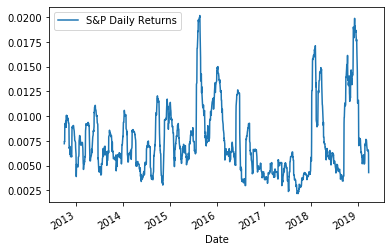

In [70]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp_Returns.rolling(window=21).std().plot()

In [71]:
# Correlation
correlation = sp_Returns.corr()
correlation

,S&P Daily Returns
S&P Daily Returns,1.0


In [72]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
combined_df = pd.concat([cumulative_returns, sp_Returns], axis="columns", join="inner")
combined_df
#combined_df.plot()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Daily Returns,S&P Daily Returns
Date,,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408,0.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208,-0.001195
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632,0.014378
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634,-0.003929
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123,0.017254
...,...,...,...,...,...,...,...,...
2019-04-15,1.157839,0.786506,0.862797,1.525584,1.958591,1.264103,0.725056,-0.000509
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,0.726708,0.002279
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,0.725562,-0.001577


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [73]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [74]:
# Annualzied Sharpe Ratios
sharpe_ratios = (result.mean() * 252) / (result.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P Daily Returns             -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

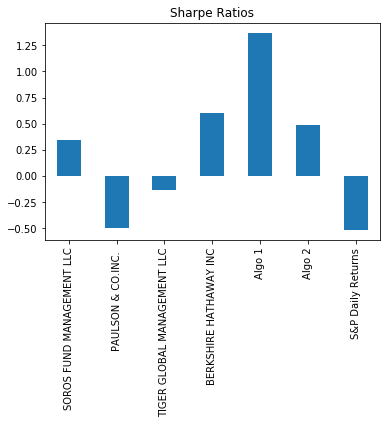

In [75]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [76]:
# Read the first stock
aapl_historical = pd.read_csv("Resources/aapl_historical.csv", 
                              index_col="Trade DATE", infer_datetime_format =True, parse_dates=True) 
aapl_portfolio = aapl_historical.dropna()
aapl_portfolio.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [77]:
# Read the second stock
cost_historical = pd.read_csv("Resources/cost_historical.csv", 
                              index_col="Trade DATE", infer_datetime_format =True, parse_dates=True) 
cost_portfolio = cost_historical.dropna()
cost_portfolio.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [78]:
# Read the third stock
goog_historical = pd.read_csv("Resources/goog_historical.csv", 
                              index_col="Trade DATE", infer_datetime_format =True, parse_dates=True) 
goog_portfolio = goog_historical.dropna()
goog_portfolio.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [79]:
# Concatenate all stocks into a single DataFrame
stocks = pd.concat([aapl_portfolio, cost_portfolio, goog_portfolio], axis=1, join='inner')
stocks.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40


In [80]:
# Reset the index
#index already set at Trade Date for each stock when read. see above code. 
stocks = pd.concat([aapl_portfolio, cost_portfolio, goog_portfolio], axis=1, join='inner')
stocks.head()
stocks = stocks['NOCP']
stocks = stocks.reset_index()

In [81]:
# Drop Nulls
stocks.dropna(inplace=True)

In [82]:
#stocks.info()
#stocks = stocks.reset_index()
#stocks.head() 
stocks.rename(columns={"NOCP":"AAPL","NOCP":"COST", "NOCP":"GOOG"})
stocks

,Trade DATE,NOCP,NOCP,NOCP
0,2019-05-09,200.72,243.47,1162.38
1,2019-05-08,202.90,241.34,1166.27
2,2019-05-07,202.86,240.18,1174.10
3,2019-05-06,208.48,244.23,1189.39
4,2019-05-03,211.75,244.62,1185.40
...,...,...,...,...
245,2018-05-17,186.99,199.60,1078.59
246,2018-05-16,188.18,198.71,1081.77
247,2018-05-15,186.44,195.48,1079.23
248,2018-05-14,188.15,195.88,1100.20


In [83]:
#stocks.groupby(["Trade DATE"]).agg(stocks.pct_change)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [84]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
portfolio_returns = stocks.dot(weights)
portfolio_returns.head()

ValueError: Dot product shape mismatch, (250, 4) vs (3,)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [85]:
stock_changes.to_csv("stock-changes.csv")

In [94]:
# YOUR CODE HERE
appl = stocks.iloc[:,1]
cost = stocks.iloc[:,2]
goog = stocks.iloc[:,3]
stocks["APPL"]=appl
stocks["COST"]=cost
stocks["GOOG"]=goog
#stock_changes = stocks.loc[:,"APPL":"GOOG"].pct_change()
#stock_changes

In [95]:
#calculate daily return
stocks.loc[:,"APPL":"GOOG"]
stocks.loc[:,"APPL":"GOOG"].pct_change()
stock_changes = stocks.loc[:,"APPL":"GOOG"].pct_change()
stock_changes

,APPL,COST,GOOG
0,NaN,NaN,NaN
1,0.010861,-0.008749,0.003347
2,-0.000197,-0.004806,0.006714
3,0.027704,0.016862,0.013023
4,0.015685,0.001597,-0.003355
...,...,...,...
245,0.003650,0.003217,0.011469
246,0.006364,-0.004459,0.002948
247,-0.009246,-0.016255,-0.002348
248,0.009172,0.002046,0.019431


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [96]:
# Risk
# YOUR CODE HERE

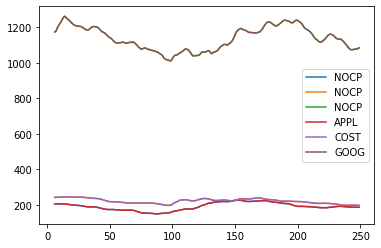

In [97]:
# Rolling
# YOUR CODE HERE
#aapl_portfolio.rolling(window=7).mean().plot()
#goog_portfolio.rolling(window=7).mean().plot()
#cost_portfolio.rolling(window=7).mean().plot()
stocks.rolling(window=7).mean().plot()

In [98]:
# Beta
# YOUR CODE HERE
#covariance = daily_returns['stocks'].cov(daily_returns['SP500'])
#covariance

#variance = daily_returns['stocks'].var()
#variance

#stocks_beta = covariance / variance
#stocks_beta

In [99]:
# Annualzied Sharpe Ratios
stocks_ratios = (stocks.mean() * 252) / (stocks.std() * np.sqrt(252))
stocks_ratios

NOCP    141.987456
NOCP    244.268994
NOCP    266.090554
APPL    141.987456
COST    244.268994
GOOG    266.090554
dtype: float64

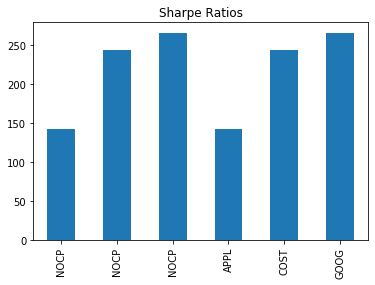

In [100]:
# Visualize the sharpe ratios as a bar plot
stocks_ratios.plot(kind="bar", title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [92]:
# YOUR CODE HERE

In [93]:
stock_changes.to_csv("stock-changes.csv")

NameError: name 'stock_changes' is not defined